## The central dogma

Replication: DNA is copied during cell division so the two daughter cells inherit the same genetic information. 

Transcription: the information in the DNA of every cell is converted into small, portable RNA messages.

Translation: During translation, these messages travel from where the DNA is in the cell nucleus to the ribosomes where they are ‘read’ to make specific proteins.

Consider a gene that is regulated by a transcription factor $T$, and let M denote the RNA molecular species resulting from this gene transcription. Under the assumption that chemical kinetics can be used to model gene expression and gene regulation, we can write the following reaction:

$$
\begin{matrix}
T+D &\overset{k_M}{\longrightarrow}& M \tag{1}\\ 
M &\overset{\gamma_M}{\longrightarrow}& 0 
\end{matrix}
$$

The equation governing the dynamics of the RNA concentration [M] is:

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  k_M [D]  [T]- \gamma_M [M] \tag{2}
$$


where

- $[M]$ is the concentration of mRNA 
- $[D]$ is the concentration of gene copies
- $[T]$ is the transcription factor
- $k_M$ is the maximum transcription rate of a gene copy 
- $\gamma_M$ is the RNA degradation rate 

The dynamics of transcription can be found by numerically simulating the system


In [2]:
using Plots; gr()
using DifferentialEquations

In [3]:
function CentralDogma1!(du,u,p,t)
    k_M,γ_M,T,D= p
    du[1] = -γ_M*u[1]+k_M*T*D
end

CentralDogma1! (generic function with 1 method)

In [4]:
CentralDogma1_DSL! = @ode_def ab begin
   dM = -γ_M*M+k_M*T*D
    end k_M γ_M T D

(::ab{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

In [5]:
k_M=1
γ_M=1
T=1
D=1
p=[k_M,γ_M,T,D];
tspan = (0.0,10.0)
u0=[0.02]
prob1 = ODEProblem(CentralDogma1_DSL!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.02]

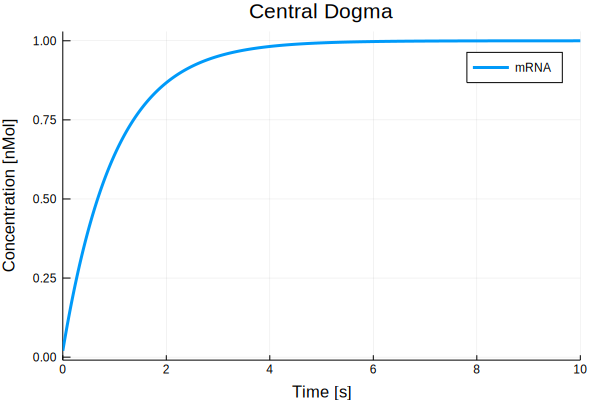

In [6]:
sol1 = solve(prob1)
plot(sol1,label=["mRNA"])
title!("Central Dogma")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

Normally, one molecule of transcription factor results in many molecules of mRNA. Therefore the relation between the change in $M$ and the number of molecules of transciption factor $T$ is a function: 

$$\frac{\mathrm{d} [M]}{\mathrm{d} t}=  k_M [D]  \Phi ([T])- \gamma_M [M] \tag{3}
$$

Ø([T]) can be interpreted as the probability that a gene copy is transcribed at a given time, as a function of $[T]$. 
T can be an activator (start transcription) or a repressor (stop transcription). 
Depending on this, the regulatory function $\Phi([T])$ will increase or decrease with T. As a first approximation, $\Phi([T])$ is often assumed as a step function., i.e, the gene is transcribed (repressed) when the transcription factor is bounded.  

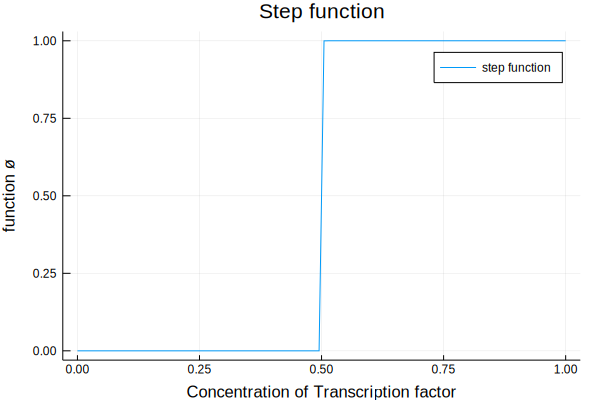

In [7]:
T_vector= LinRange(0,1,100)
n=1000
K=0.5
ϕ=T_vector.^n./(K.^n.+T_vector.^n)
plot(T_vector,ϕ,label="step function")
title!("Step function")
xlabel!("Concentration of Transcription factor")
ylabel!("function ø")

A more realistic scenario (and mathematically easier) is that the probability of transcription is a sigmoidal. 

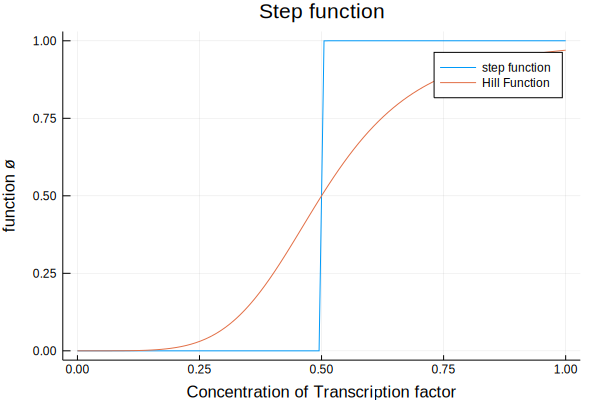

In [8]:
n=5
K=0.5
ϕ=T_vector.^n./(K.^n.+T_vector.^n)
plot!(T_vector,ϕ,label="Hill Function")
title!("Step function")
xlabel!("Concentration of Transcription factor")
ylabel!("function ø")

Therefore, the most common approach is to use a Hill function. 

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}= k_m \frac{[T^n][D]}{K^n+T^n}-\gamma_M[M]= \alpha_m \frac{[T^n]}{K^n+T^n}-\gamma_M[M] \tag{4}
$$

where we defined $\alpha_m= k_m [D]$ as the maximum transcription rate of $M$. Now if se solve the differential equation:

In [9]:
function CentralDogma2!(du,u,p,t)
    α_M,γ_M,T,n= p
    du[1] = -γ_M*u[1]+α_M*T^n/(K_M^n +T^n)
end

CentralDogma2! (generic function with 1 method)

but we prefer to use the simplest DSL notation

In [10]:
CentralDogma2_DSL! = @ode_def ab begin
   dM = -γ_M*M+α_M*T^n/(K_M^n +T^n)
    end α_M γ_M T n

(::ab{getfield(Main, Symbol("##11#15")),getfield(Main, Symbol("##12#16")),getfield(Main, Symbol("##13#17")),Nothing,Nothing,getfield(Main, Symbol("##14#18")),Expr,Expr}) (generic function with 2 methods)

In [11]:
n=5
K_M=1
α_M=k_M*D
p=[α_M,γ_M,T,n];
tspan = (0.0,10.0)
u0=[0.02]
prob3 = ODEProblem(CentralDogma2!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.02]

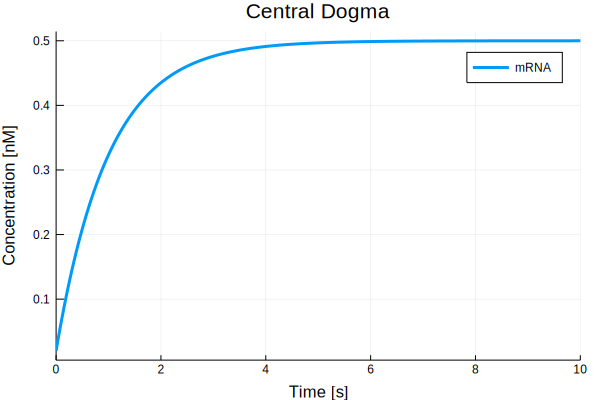

In [12]:
sol3 = solve(prob3)
plot(sol3,label=["mRNA"])
title!("Central Dogma")
xlabel!("Time [s]")
ylabel!("Concentration [nM]")

It does not look too different. But now if we change the concentration of transcription factor it looks more realistic. 

In [14]:
function CentralDogma_function(α_M,γ_M,T,n)
     p=[α_M,γ_M,T,n];
     prob4 = ODEProblem(CentralDogma2_DSL!,u0,tspan,p)
     sol4 = solve(prob4)
     #plot_stuff(sol4)
     x=("T = $(T)")
     plot!(sol4,label=x)
end

CentralDogma_function (generic function with 1 method)

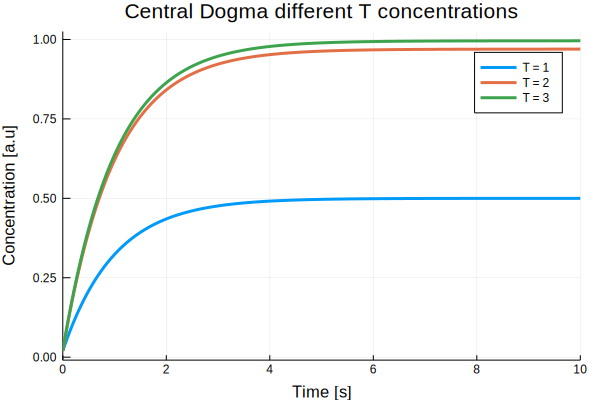

In [15]:
u0 = [0.02]
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=1
T=1

plot()
for i in [1,2,3]
    CentralDogma_function(α_M,γ_M,i,n)
end
title!("Central Dogma different T concentrations ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

### Central Dogma with Transcritional repression 

Now we use the Hill function derived for transcrioptional repressors

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{[K]^n}{K^n+[T]^n}-\gamma_M[M] \tag{5}\\ 
\end{align*}
$$

and we solve the system numerically

In [16]:
CentralDogma3_DSL! = @ode_def ab begin
   dM = -γ_M*M+α_M*K_M^n/(K_M^n +T^n)
    end α_M γ_M T n

(::ab{getfield(Main, Symbol("##19#23")),getfield(Main, Symbol("##20#24")),getfield(Main, Symbol("##21#25")),Nothing,Nothing,getfield(Main, Symbol("##22#26")),Expr,Expr}) (generic function with 2 methods)

In [17]:
function CentralDogma_function2(α_M,γ_M,T,n)
     p=[α_M,γ_M,T,n];
     prob7 = ODEProblem(CentralDogma3_DSL!,u0,tspan,p)
     sol7 = solve(prob7)
     #plot_stuff(sol4)
     x=("T = $(T)")
     plot!(sol7,label=x)
end

CentralDogma_function2 (generic function with 1 method)

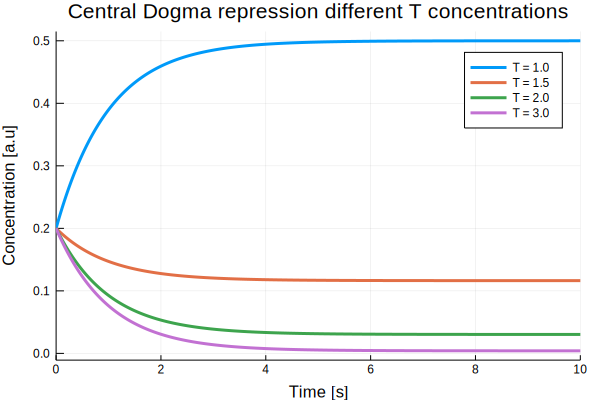

In [18]:
u0 = [0.2]
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=1
T=1

plot()
for i in [1,1.5,2,3]
    CentralDogma_function2(α_M,γ_M,i,n)
end
title!("Central Dogma repression different T concentrations ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

## Protein dynamics

Tne next step is to add the dynamics of the protein

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{[T]^n}{K^n+[T]^n}-\gamma_M[M] \tag{5}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P]
\end{align*}
$$

where $P$ is the concentration of protein, $\alpha_P$ and $\gamma_P$ correspond to syntehsis and degradation of P

In [19]:
CentralDogma4_DSL! = @ode_def ab begin
   dM = -γ_M*M+α_M*T^n/(K_M^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M T n α_P γ_P

(::ab{getfield(Main, Symbol("##27#31")),getfield(Main, Symbol("##28#32")),getfield(Main, Symbol("##29#33")),Nothing,Nothing,getfield(Main, Symbol("##30#34")),Expr,Expr}) (generic function with 2 methods)

In [20]:
u0 = [0.02,0.01]
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=1
T=1
α_P=0.4
γ_P=0.4
p=[α_M,γ_M,T,n,α_P,γ_P];

prob5 = ODEProblem(CentralDogma4_DSL!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.02, 0.01]

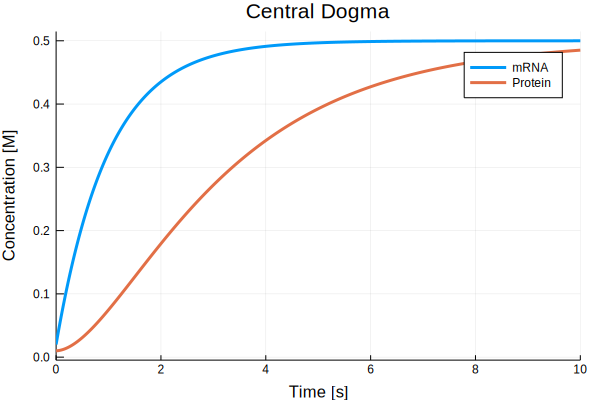

In [21]:
sol5 = solve(prob5)
plot(sol5,label=["mRNA","Protein"])
title!("Central Dogma")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

and for the repressor system 

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{K^n}{K^n+[T]^n}-\gamma_M[M] \tag{5}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P]
\end{align*}
$$


In [22]:
CentralDogma5_DSL! = @ode_def ab begin
   dM = -γ_M*M+α_M*K_M^n/(K_M^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M T n α_P γ_P

(::ab{getfield(Main, Symbol("##35#39")),getfield(Main, Symbol("##36#40")),getfield(Main, Symbol("##37#41")),Nothing,Nothing,getfield(Main, Symbol("##38#42")),Expr,Expr}) (generic function with 2 methods)

In [23]:
u0 = [0.2,0.01]
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=1
T=2
α_P=0.4
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P];

prob6 = ODEProblem(CentralDogma5_DSL!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.2, 0.01]

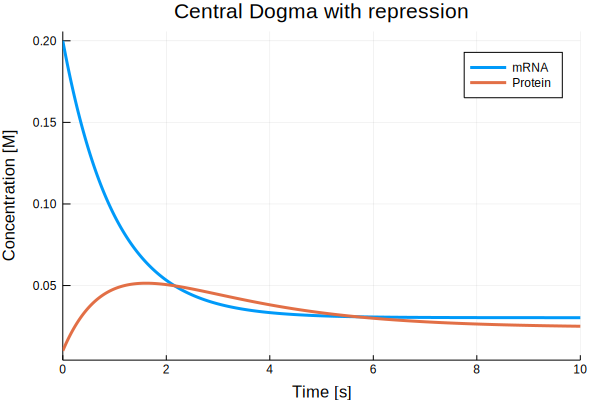

In [24]:
sol6 = solve(prob6)
plot(sol6,label=["mRNA","Protein"])
title!("Central Dogma with repression")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## Minimal netorwk motifs: Negative feedback loop

A negative feedback loop is a system where the product of transcription represses directly or indirectly the expression of the mRNA.  A very simple set of differential equations is as follows. 

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{K^n}{K^n+[P]^n}-\gamma_M[M] \tag{5}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P]
\end{align*}
$$


In [28]:
CentralDogma6_DSL! = @ode_def ab begin
   dM = -γ_M*M+α_M*K_M^n/(K_M^n +P^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M n α_P γ_P

(::ab{getfield(Main, Symbol("##51#55")),getfield(Main, Symbol("##52#56")),getfield(Main, Symbol("##53#57")),Nothing,Nothing,getfield(Main, Symbol("##54#58")),Expr,Expr}) (generic function with 2 methods)

In [29]:
u0 = [0.2,0.01]
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=0.3
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,n,α_P,γ_P];

prob6 = ODEProblem(CentralDogma6_DSL!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.2, 0.01]

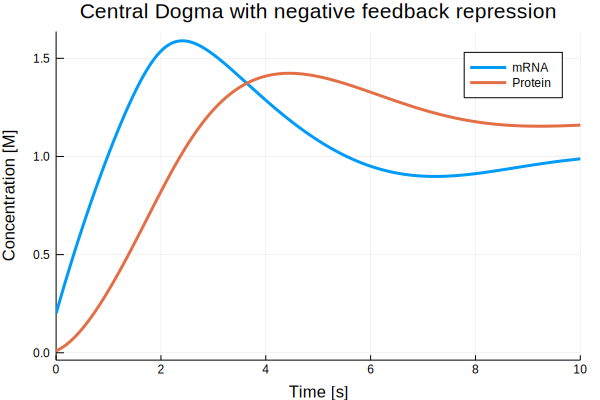

In [30]:
sol6 = solve(prob6)
plot(sol6,label=["mRNA","Protein"])
title!("Central Dogma with negative feedback repression")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## Minimal netorwk motifs: positive feedback loop

A positive feedback loop is a system where the product of transcription activates directly or indirectly the expression of the mRNA.  A very simple set of differential equations is as follows. 

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{[P]^n}{K^n+[P]^n}-\gamma_M[M] \tag{6}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P]
\end{align*}
$$



In [31]:
CentralDogma7_DSL! = @ode_def ab begin
   dM = -γ_M*M+α_M*P^n/(K_M^n +P^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M n α_P γ_P

(::ab{getfield(Main, Symbol("##59#63")),getfield(Main, Symbol("##60#64")),getfield(Main, Symbol("##61#65")),Nothing,Nothing,getfield(Main, Symbol("##62#66")),Expr,Expr}) (generic function with 2 methods)

In [39]:
u0 = [0.2,0.01]
tspan = (0.0,50.0)
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=0.3
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,n,α_P,γ_P];

prob7 = ODEProblem(CentralDogma7_DSL!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: [0.2, 0.01]

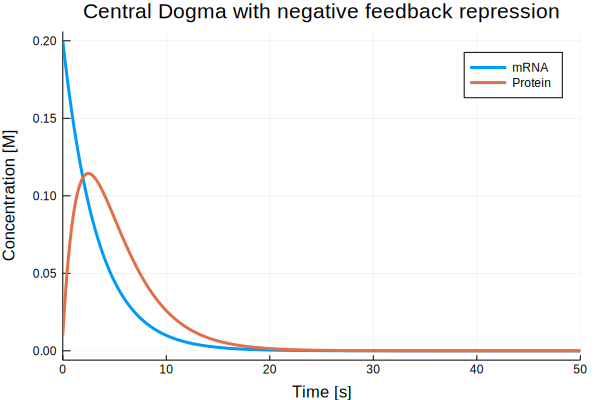

In [40]:
sol7 = solve(prob7)
plot(sol7,label=["mRNA","Protein"])
title!("Central Dogma with negative feedback repression")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

A positive feeback loop generates bistability, and therefore, dependence on initial conditions. Lets check that:

In [84]:
function CentralDogma_function3(α_M,γ_M,n,mrna_0,protein_0,α_P,γ_P)
     p=[α_M,γ_M,n,α_P,γ_P];
     u0=[mrna_0,protein_0]
     prob7 = ODEProblem(CentralDogma7_DSL!,u0,tspan,p)
     sol7 = solve(prob7)
     #plot_stuff(sol4)
     x=("mRNA_0 = $(mrna_0)")
    x=("mRNA_0 = $(mrna_0)")
    plot!(sol7.t,sol7[1,:])
     #plot!(sol7,label=x)
end

CentralDogma_function3 (generic function with 2 methods)

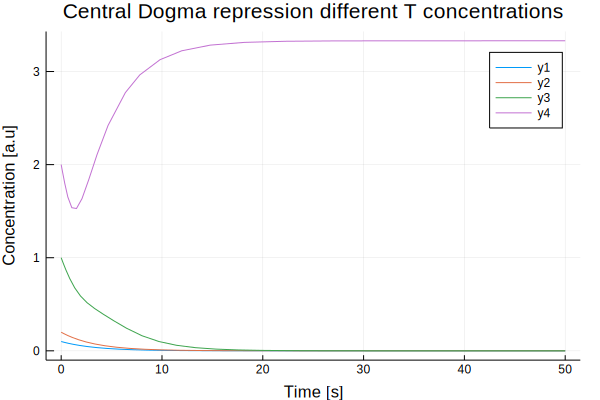

In [85]:
n=5
K_M=1
D=1
α_M=k_M*D
γ_M=0.3
α_P=0.6
γ_P=0.5

plot()
for i in [0.1,0.2,1,2]
    CentralDogma_function3(α_M,γ_M,n,i,0.01,α_P,γ_P)
end
title!("Central Dogma repression different T concentrations ")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

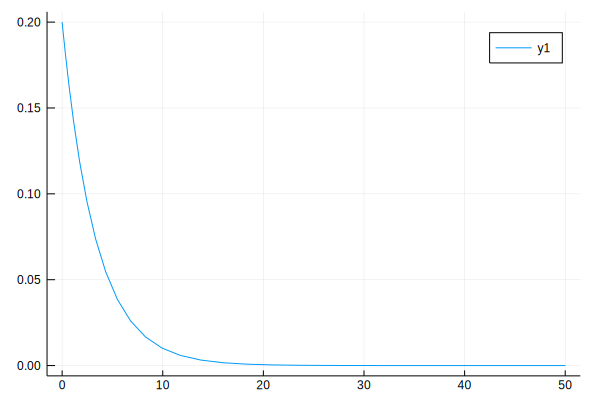

In [81]:
plot(sol7.t,sol7[1,:])

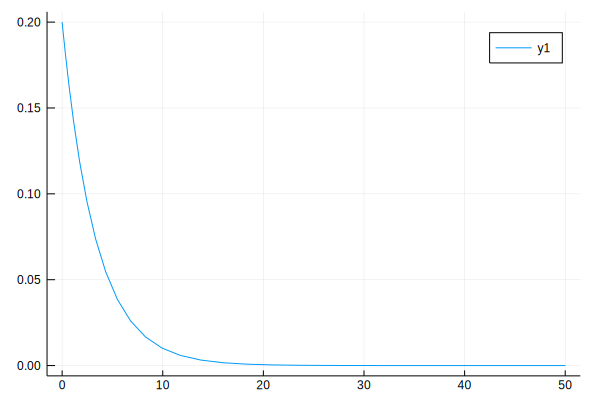

14-element Array{Float64,1}:
 0.2                  
 0.14816482126554356  
 0.10977369902442748  
 0.08133875723289107  
 0.06026939328736347  
 0.04465475766777891  
 0.033083454690984844 
 0.024509715460698897 
 0.018157530275945848 
 0.013451376444200523 
 0.009965184300638925 
 0.0073822700758415785
 0.005469014498150179 
 0.004051449519889407 